Name:- Khushi Mishra <br>
Roll no. :- 2201321650025 <br>
Branch:- CS-D

### Topic - Analysis on titanic dataset

### Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print ("libraries successfully loaded")

libraries successfully loaded


### Loaded the dataset

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
print("file reading succefull")

file reading succefull


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Inspections

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<li> Total entries= 891 </li>
<li>we can see that column  Cabin has more than 75% null values we can drop this column</li>
<li>Most numerical columns like 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare' are integers or floats, suitable for numerical operations.</li>
<li>where as 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' are object types, which would require encoding for numerical analysis likes(one-hot endoding) </li>
<li>We can predict the survival rating</li>

### Pre-processsing

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<li><b> Survival rate:</b> 'Survival Rating' is approximately 0.38, it means that only about 38% of the passengers in this dataset survived.</li>
                                                                                                                                    <li><b>Age Distribution:</b>The mean age is around 29.7 years, with a standard deviation of about 14.5. and the difference between the mean and median (28.0) suggests a slight right skew in the age distribution.</li>   
                                                                                                                                    <li><b>Fare Distribution:</b>The mean fare is around 32.2, but the max fare is 512.3, and the 75% is only 31.0. This indicates a highly skewed distribution for Fare. </li>

#### <u> -> Handling null values

In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


###  Filling missing values

In [7]:
 #replaced Age missing values with the values of its median
df['Age'] = df['Age'].fillna(df['Age'].median())
print(f"Missing 'Age' values filled with median: {df['Age'].median()}") #meadian = 28.0

Missing 'Age' values filled with median: 28.0


In [8]:
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked)
print(f"Missing 'Embarked' values filled with mode: {most_frequent_embarked} ") 


Missing 'Embarked' values filled with mode: S 


### Dropped Unnecessary column

In [9]:
# Drop the Cabin column due to a large number of missing values (over 70%).
df.drop('Cabin', axis=1, inplace=True)
print("'Cabin' column dropped due to high number of missing values.")

'Cabin' column dropped due to high number of missing values.


In [10]:
#Drop unnecessary columns that are unlikely to be useful for modeling or analysis
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
print("Dropped 'PassengerId', 'Name', 'Ticket' columns.")

Dropped 'PassengerId', 'Name', 'Ticket' columns.


#### <u> -> Label Encoding

In [11]:
 #Encode categorical features:
 #'Sex': Convert 'male' and 'female' to numerical (0 and 1).
# 'male' can be 0, 'female' can be 1.

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print("Encoded 'Sex' column (male: 0, female: 1).")


Encoded 'Sex' column (male: 0, female: 1).


#### <u> -> One- Hot Encoding

In [12]:
# 'Embarked': Convert 'S', 'C', 'Q' to numerical using one-hot encoding.

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # drop_first avoids multicollinearity
print("One-hot encoded 'Embarked' column.")

One-hot encoded 'Embarked' column.


In [13]:
# Verify no more missing values and checked data types after preprocessing
print(df.isnull().sum())
df.info()
print(df.head())


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       

# -> Correlation Matrix

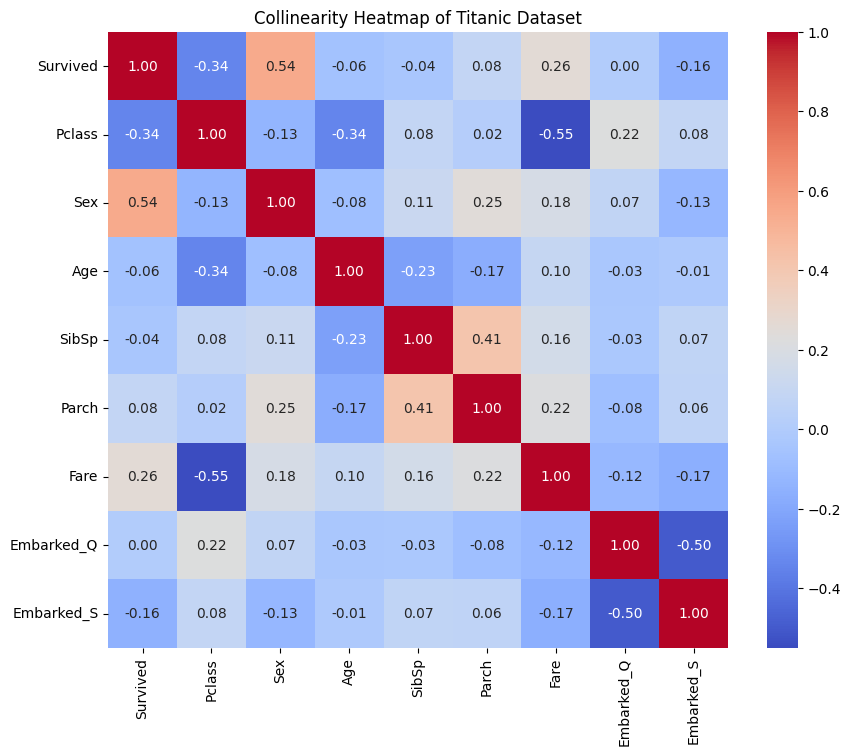

In [14]:
correlation_matrix = df.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
# annot=True displays the correlation values on the heatmap.
# cmap='coolwarm' sets the color map, where red indicates positive correlation and blue indicates negative.
# fmt=".2f" formats the annotations to two decimal places.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Collinearity Heatmap of Titanic Dataset')
plt.show()

# -> Descriptive Analysis

In [15]:
gender_count=df['Sex'].value_counts()
print(gender_count)
print(gender_count.index) #---->it is the result of first column
print(gender_count.values) #--->it is the result of second column


Sex
0    577
1    314
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Sex')
[577 314]


#### <u> -> How many them were male and female? using chart!

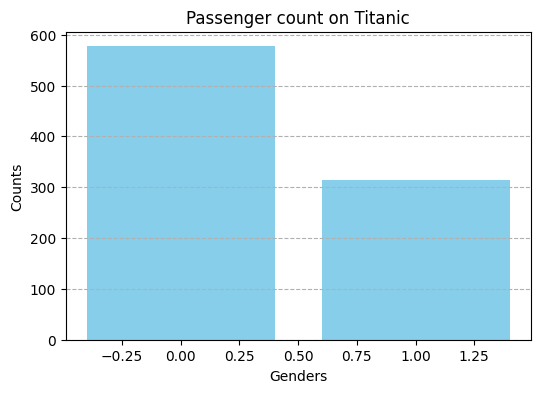

In [16]:
#--->plotting graph(bi-variate)

#step 1=figure size
plt.figure(figsize=(6,4))
#by using matplotlib
plt.bar(gender_count.index,gender_count.values, color="skyblue")
plt.xlabel("Genders")
plt.ylabel("Counts")
plt.title("Passenger count on Titanic")

plt.grid(True, axis="y", linestyle="--")
plt.show()

#### <u> ->  What was the age distribution? 

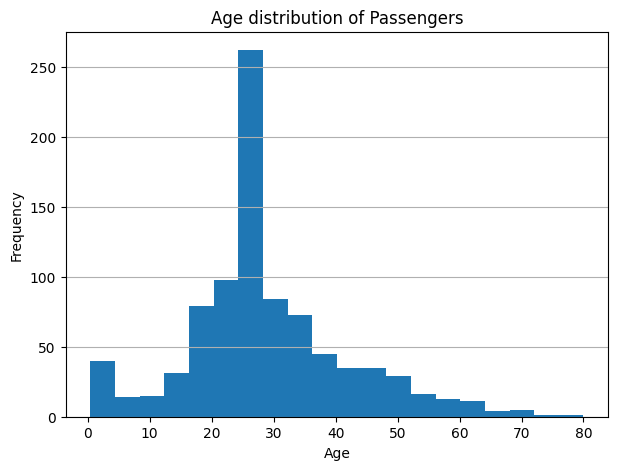

In [17]:
##histogram==>to represent the continuous disribution of numberical value

plt.figure(figsize=(7,5))
plt.hist(df["Age"].dropna(),bins=20)
plt.title("Age distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True,axis="y")
plt.show()

#### <u>-> Survival Rate by gender

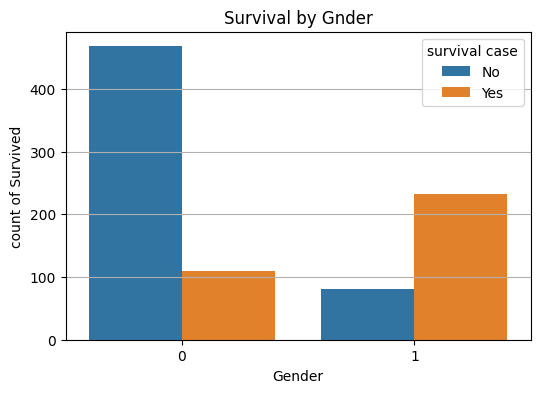

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title ("Survival by Gnder")
plt.xlabel('Gender')
plt.ylabel('count of Survived')

plt.legend(title='survival case',labels=['No','Yes'])
plt.grid(True,axis='y')
plt.show()

MEN DIED MORE IN COMPARISON WITH WOMEN

#### <u> -> Survival Rate by Passenger Class

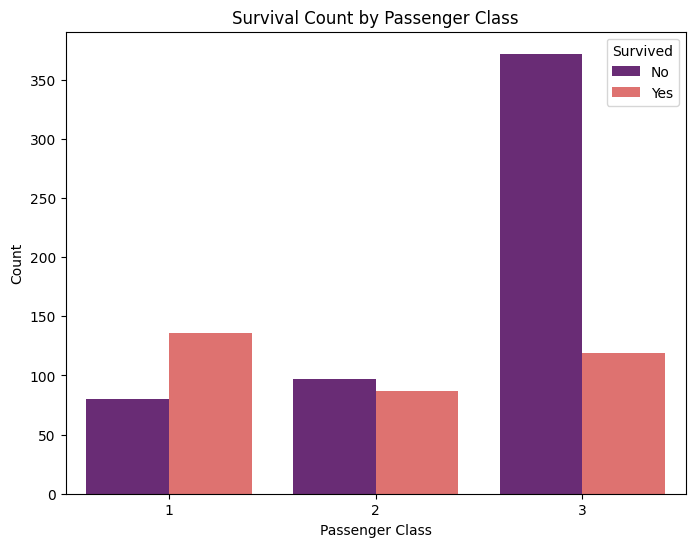

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='magma')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

PASSENGERS WITH P3 CLASS HAS LESS SURVIVAL RATE.

#### <u> ->  How  does fare vary with class?

C:\Users\Welcome\AppData\Local\Temp\ipykernel_20624\752827327.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Fare',data=df,palette='Set2')


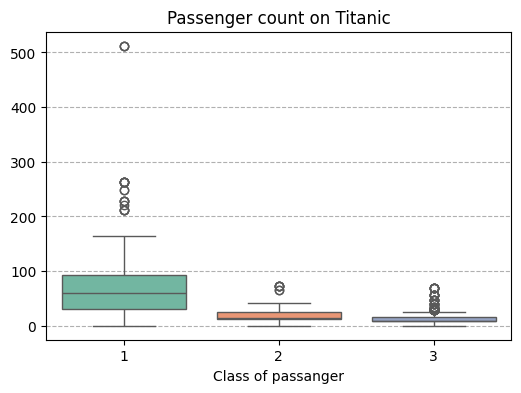

In [20]:
#--->plotting graph(bi-variate)


#step 1=figure size
plt.figure(figsize=(6,4))
#by using seaborn
sns.boxplot(x='Pclass',y='Fare',data=df,palette='Set2')
plt.xlabel("Class of passanger")
plt.ylabel("")
plt.title("Passenger count on Titanic")

plt.grid(True, axis="y", linestyle="--")
plt.show()

#### <u> -> Lets see If age related to Fare price 

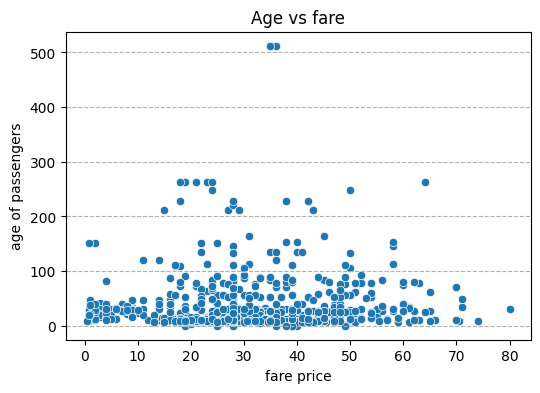

In [21]:
plt.figure(figsize=(6,4))
#by using seaborn
sns.scatterplot(x='Age',y='Fare',data=df)
plt.xlabel("fare price")
plt.ylabel("age of passengers")
plt.title("Age vs fare")

plt.grid(True, axis="y", linestyle="--")
plt.show()

####  Multivariate chart 
#### <u> -> How does age  and fare vary across survival and gender?

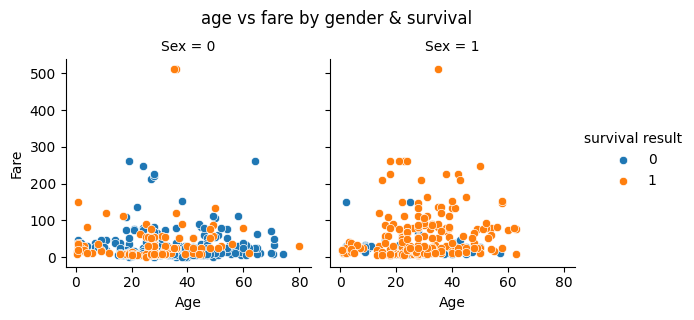

In [22]:
g = sns.FacetGrid(df,col='Sex', hue ='Survived')
g.map_dataframe(sns.scatterplot,x='Age',y='Fare')
g.add_legend(title='survival result')
g.fig.suptitle('age vs fare by gender & survival',y=1.05)
plt.show()

#### <u> -> Survial by Gender & Pclass'

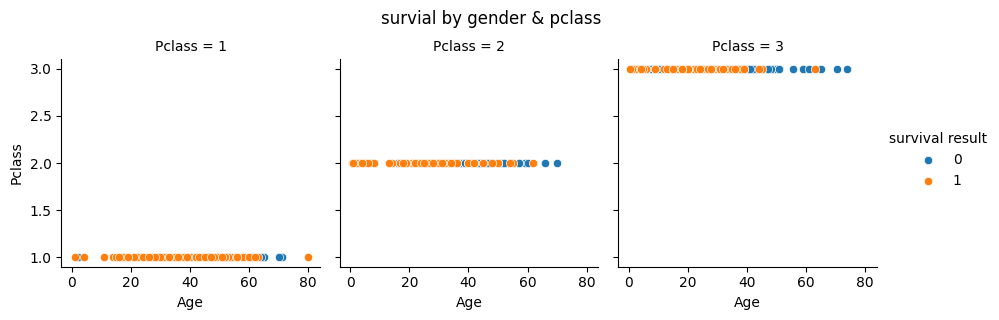

In [23]:
g = sns.FacetGrid(df,col='Pclass', hue ='Survived')
g.map_dataframe(sns.scatterplot,x='Age',y='Pclass')
g.add_legend(title='survival result')
g.fig.suptitle('survial by gender & pclass',y=1.05)
plt.show()

#### <u> -> does age impact survival differently for men & women?

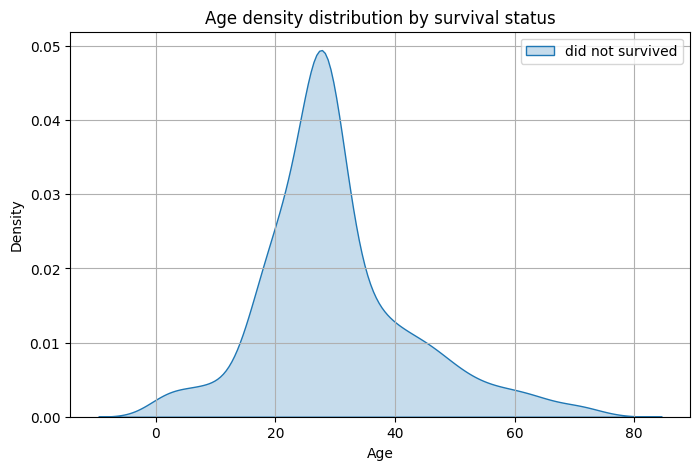

In [24]:
#Kernel Density Graph (Kde)
plt.figure(figsize=(8,5))
sns.kdeplot(data = df[df['Survived']==0],x='Age',label ="did not survived",fill = True)
plt.title("Age density distribution by survival status")
plt.xlabel("Age")
plt.legend()
plt.grid(True)
plt.show()

#### <u> -> Distribution of Age for Survivors vs. Non-Survivors

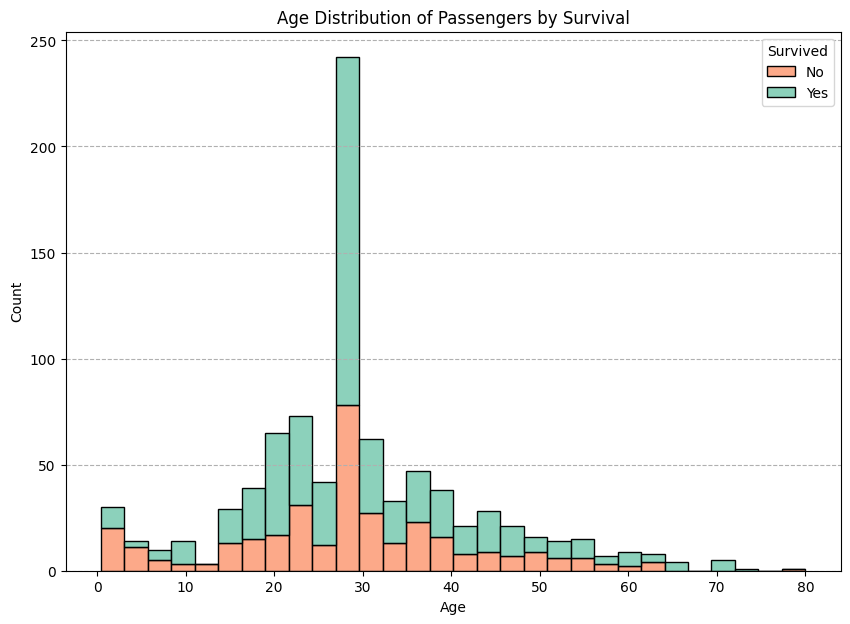

In [25]:

plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, palette='Set2')
plt.title('Age Distribution of Passengers by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True, axis="y", linestyle="--")
plt.show()

# ->Predictive Analysis (ML)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### <u> ->  Define features and target

In [27]:

features = ['Pclass', 'Sex', 'Age','Fare']
X = df[features]
y = df['Survived']

#### <u> ->  Split data into training and testing sets

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### <u> -> Train a Logistic Regression model

In [29]:
# ensuring the null_count
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### <u> -> Make predictions and evaluate the model

In [31]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")

Model Accuracy on Test Set: 0.80


# -> Prescriptive Analysis

Based on the diagnostic and predictive analysis, the following actions could have increased survival rates:")
- **Prioritize Female and First-Class Passengers:** The analysis clearly shows that female passengers and those in higher classes had significantly higher survival rates.")
- **Focus on Younger Passengers:** While not as strong as gender or class, age was also a factor, with a higher proportion of young children surviving.")
-  **Strategic Rescue Operations:** The rescue efforts seem to have favored certain demographics. A more equitable rescue plan would have been necessary to increase overall survival.")